In [ ]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import OneHotEncoder
from scipy import sparse
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import f1_score

### 1. Data Description

In [ ]:
from google.colab import drive
drive.mount('gdrive')
PATH = 'gdrive/MyDrive/Kaggle/'
# PATH = 'gdrive/MyDrive/Projet Kaggle INF8245E/'

Mounted at gdrive


In [ ]:
train = pd.read_csv(PATH+'data/train.csv')
test = pd.read_csv(PATH+'data/test.csv')
sample_submission = pd.read_csv(PATH+'data/sample_submission.csv')

In [ ]:
train.head(3)

,Id,Band Name,Band Genre,Band Country of Origin,Band Debut,Concert ID,Concert Attendance,Inside Venue,Rain,Seated,Personnality Trait 1,Personnality Trait 2,Personnality Trait 3,Personnality Trait 4,Concert Goer Age,Concert Goer ID,Height (cm),Concert Goer Country of Origin,Concert Enjoyment
0,ConcertExperience_180106,Teenage Crazy Blue Knickers,Indie/Alt Rock,United States of America (USA),1976.0,900.0,2980.0,False,False,NaN,0.330843,-0.958408,-0.943548,-1.636806,29.0,concert_goer_1985,140.0,Paraguay,Did Not Enjoy
1,ConcertExperience_146268,Beyond Devon,Pop Music,United States of America (USA),1968.0,731.0,54.0,True,False,True,-2.069449,0.017777,-1.910675,0.610265,43.0,concert_goer_1874,158.0,United Kingdom (UK),Enjoyed
2,ConcertExperience_128743,Ron Talent,Rock n Roll,Canada,1955.0,NaN,162754.0,False,False,True,-0.484268,1.968772,-0.064167,-1.260871,68.0,concert_goer_442,159.0,United States of America (USA),Did Not Enjoy


In [ ]:
train.shape,test.shape

((170000, 19), (30000, 18))

In [ ]:
# Checks the proportion of missing values per category
print("Proportions of missing data in train dataset : ")
print(train.isnull().sum()/train.shape[0])
print("\nProportions of missing data in test dataset : ")
print(test.isnull().sum()/test.shape[0])

Proportions of missing data in train dataset : 
Id                                0.000000
Band Name                         0.005053
Band Genre                        0.005200
Band Country of Origin            0.004647
Band Debut                        0.005041
Concert ID                        0.005118
Concert Attendance                0.005265
Inside Venue                      0.004929
Rain                              0.005065
Seated                            0.004894
Personnality Trait 1              0.005012
Personnality Trait 2              0.004994
Personnality Trait 3              0.005253
Personnality Trait 4              0.005088
Concert Goer Age                  0.005018
Concert Goer ID                   0.004794
Height (cm)                       0.004982
Concert Goer Country of Origin    0.005053
Concert Enjoyment                 0.000000
dtype: float64

Proportions of missing data in test dataset : 
Id                                0.000000
Band Name                    

In [ ]:
# Check Ids are unique
assert len(np.unique(train["Id"]))==len(train)
assert len(np.unique(test["Id"]))==len(test)

In [ ]:
y_train = train["Concert Enjoyment"]
X_train = train.iloc[:,1:-1]
X_test = test.iloc[:,1:]

In [ ]:
# Check y_train
np.unique(y_train)

array(['Best Concert Ever', 'Did Not Enjoy', 'Enjoyed',
       'Worst Concert Ever'], dtype=object)

In [ ]:
# Checks columns are same
assert (X_train.columns == X_test.columns).all()
assert (X_train.dtypes == X_test.dtypes).all()

In [ ]:
# Checks the number of unique values per category
X_test.dropna().apply(lambda x:len(np.unique(x)))

Band Name                           54
Band Genre                           8
Band Country of Origin               4
Band Debut                          34
Concert ID                        1000
Concert Attendance                  18
Inside Venue                         2
Rain                                 2
Seated                               2
Personnality Trait 1              2000
Personnality Trait 2              2034
Personnality Trait 3              2039
Personnality Trait 4              2000
Concert Goer Age                    61
Concert Goer ID                   2000
Height (cm)                         51
Concert Goer Country of Origin     152
dtype: int64

In [ ]:
categorical_columns = ["Band Name","Band Genre","Band Country of Origin","Concert ID","Inside Venue","Rain","Seated","Concert Goer ID","Concert Goer Country of Origin"]
numerical_columns = ["Band Debut","Concert Attendance","Personnality Trait 1","Personnality Trait 2","Personnality Trait 3","Personnality Trait 4","Concert Goer Age","Height (cm)"]
len(categorical_columns),len(numerical_columns)

(9, 8)

In [ ]:
# Checks if train and test categories are same
for column in categorical_columns:
  assert (np.unique(X_test.dropna()[column]) == np.unique(X_train.dropna()[column])).all()

In [ ]:
# Checks Categories
for column in categorical_columns:
  print(f"\n{column} : {np.unique(X_train.dropna()[column])}")


Band Name : ['A Dozen Running Iced Frogs' 'Allo Knickers' 'Beyond Devon' 'Big Autumn'
 'Big Division' 'Big Frogs Dream' 'Big Joystick' 'Crazy Crazy'
 'Crazy Dream and a Pinch of Joystick' 'Crazy Frogs of Devon'
 'Crazy Joystick Cult' 'Crazy Tooth' 'Crazyplay' 'Das Joystick'
 'Devon Revival' 'Devon Thunder Thighs' 'Disciples Of Devon'
 'Flight of the Knickers' 'Frogsica' 'Insert Band Name' "It's My Joystick"
 'Joystick A Dozen' 'Joystick Army' 'Joystick Attack'
 'Joystick for the Jockies' 'Joystick of the Big Knickers' 'King Blue'
 'Knickers A Dozen' 'Knickers for the Jockies' 'Lord of the Crazy Frogs'
 'My Heart, Your Thighs' 'Puddle of Joystick' 'Purely Blue' 'Ron Nor'
 'Ron Talent' "Ron's Midnight Jockies" 'Ronatron' 'Rubbish Devon Frogs'
 'Running Twins' 'Running at the Disco' 'Running for the Crazy Woman'
 'Running in Devon' 'Super Crazy Frogs' 'Taking Back Autumn'
 'Teenage Crazy Blue Knickers' 'The Big Service'
 'The Crazy Heroes of Devon' 'The Crazy R Experience'
 'The Running 

In [ ]:
# Checks numerical values
for column in numerical_columns:
  print(f"\n{column} (min,max) : {np.min(X_train.dropna()[column]),np.max(X_train.dropna()[column])}")


Band Debut (min,max) : (1955.0, 2014.0)

Concert Attendance (min,max) : (54.0, 1627540000.0)

Personnality Trait 1 (min,max) : (-3.124408013980475, 3.6288284548257344)

Personnality Trait 2 (min,max) : (-293861.500146255, 325834.0167948213)

Personnality Trait 3 (min,max) : (-3.275108025039912, 3.3088097713169256)

Personnality Trait 4 (min,max) : (-3.287787272200245, 3.8309227330178097)

Concert Goer Age (min,max) : (16.0, 76.0)

Height (cm) (min,max) : (140.0, 190.0)


In [ ]:
from collections import Counter
from tqdm import tqdm

In [ ]:
# Checks error type for Personnality Trait values
for concert_goer_id in np.unique(X_train.dropna()["Concert Goer ID"]):
  if len(np.unique(X_train.dropna().loc[X_train.dropna()["Concert Goer ID"]==concert_goer_id]["Personnality Trait 2"]))>1:
    print(Counter(X_train.dropna().loc[X_train.dropna()["Concert Goer ID"]==concert_goer_id]["Personnality Trait 2"]))
    break

Counter({-0.0953370387661154: 85, -9533.703876611547: 2})


In [ ]:
# Check errors in Concert Attendance values
Counter(X_train.dropna()["Concert Attendance"])

Counter({54.0: 19306,
         8103.0: 17010,
         540000.0: 23,
         2980.0: 20753,
         148.0: 16838,
         59874.0: 16442,
         162754.0: 15852,
         22026.0: 19165,
         403.0: 14783,
         1096.0: 15704,
         10960000.0: 19,
         29800000.0: 22,
         598740000.0: 18,
         4030000.0: 21,
         1480000.0: 22,
         220260000.0: 16,
         81030000.0: 16,
         1627540000.0: 13})

In [ ]:
# Check if the values are the same in testing and training sets
assert (np.unique(X_train.dropna()["Concert Attendance"]) == np.unique(X_test.dropna()["Concert Attendance"])).all()

### 2. Missing Data Imputation

In the first part we saw some issues with the dataset:
* There are missing values (NaN values) for each input feature.
* *Band Name*, *Band Genre* and *Band Country of Origin* features also have some missing features hidden as for example 'Insert Band Name'.
* There are sometimes several *Personnality Trait* for a single *Concert Goer*, with incoherent values.
* Some inputs of the feature *Concert Attendance* have been multiplied by 10 000.

In this part we try to correct these mistakes, and then to estimate the missing values.

#### a. Taking care of errors in the datasets

In [ ]:
y_train = train["Concert Enjoyment"]
X_train = train.iloc[:,1:-1]
X_test = test.iloc[:,1:]
df = pd.concat([X_train,X_test])

In [ ]:
df[["Band Name","Band Genre","Band Country of Origin"]].isnull().sum()

Band Name                  995
Band Genre                1022
Band Country of Origin     947
dtype: int64

In [ ]:
# Replace "Insert Band Name" with NaN
df["Band Name"].loc[df["Band Name"]=="Insert Band Name"] = df["Band Name"].loc[df["Band Name"]=="Insert Band Name"].apply(lambda x: np.nan)

# Replace "Insert Band Genre" with NaN
df["Band Genre"].loc[df["Band Genre"]=="Insert Band Genre"] = df["Band Genre"].loc[df["Band Genre"]=="Insert Band Genre"].apply(lambda x: np.nan)

# Replace "Insert Band Country of Origin" with NaN
df["Band Country of Origin"].loc[df["Band Country of Origin"]=="Insert Band Country of Origin"] = df["Band Country of Origin"].loc[df["Band Country of Origin"]=="Insert Band Country of Origin"].apply(lambda x: np.nan)

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [ ]:
df[["Band Name","Band Genre","Band Country of Origin"]].isnull().sum()

Band Name                 1202
Band Genre                1122
Band Country of Origin    1153
dtype: int64

In [ ]:
# Map goer ID to majority Personnality Trait
goer_to_personnality1 = df[["Concert Goer ID","Personnality Trait 1"]].groupby(['Concert Goer ID'])['Personnality Trait 1'].agg(pd.Series.mode)
goer_to_personnality2 = df[["Concert Goer ID","Personnality Trait 2"]].groupby(['Concert Goer ID'])['Personnality Trait 2'].agg(pd.Series.mode)
goer_to_personnality3 = df[["Concert Goer ID","Personnality Trait 3"]].groupby(['Concert Goer ID'])['Personnality Trait 3'].agg(pd.Series.mode)
goer_to_personnality4 = df[["Concert Goer ID","Personnality Trait 4"]].groupby(['Concert Goer ID'])['Personnality Trait 4'].agg(pd.Series.mode)

# Replace Personnality traits with the main majority trait in each concert goer
df.loc[df[["Concert Goer ID","Personnality Trait 1"]].notnull().all(axis=1),"Personnality Trait 1"] = np.array(goer_to_personnality1[df[["Concert Goer ID","Personnality Trait 1"]].dropna()['Concert Goer ID']])
df.loc[df[["Concert Goer ID","Personnality Trait 2"]].notnull().all(axis=1),"Personnality Trait 2"] = np.array(goer_to_personnality2[df[["Concert Goer ID","Personnality Trait 2"]].dropna()['Concert Goer ID']])
df.loc[df[["Concert Goer ID","Personnality Trait 3"]].notnull().all(axis=1),"Personnality Trait 3"] = np.array(goer_to_personnality3[df[["Concert Goer ID","Personnality Trait 3"]].dropna()['Concert Goer ID']])
df.loc[df[["Concert Goer ID","Personnality Trait 4"]].notnull().all(axis=1),"Personnality Trait 4"] = np.array(goer_to_personnality4[df[["Concert Goer ID","Personnality Trait 4"]].dropna()['Concert Goer ID']])

# When the Concert Goer ID is missing, replaces outliers with NaN
df.loc[(df["Concert Goer ID"].isnull()) & (np.abs(df["Personnality Trait 1"])>5),"Personnality Trait 1"] = df.loc[(df["Concert Goer ID"].isnull()) & (np.abs(df["Personnality Trait 1"])>5),"Personnality Trait 1"].apply(lambda x: np.nan)
df.loc[(df["Concert Goer ID"].isnull()) & (np.abs(df["Personnality Trait 2"])>5),"Personnality Trait 2"] = df.loc[(df["Concert Goer ID"].isnull()) & (np.abs(df["Personnality Trait 2"])>5),"Personnality Trait 2"].apply(lambda x: np.nan)
df.loc[(df["Concert Goer ID"].isnull()) & (np.abs(df["Personnality Trait 3"])>5),"Personnality Trait 3"] = df.loc[(df["Concert Goer ID"].isnull()) & (np.abs(df["Personnality Trait 3"])>5),"Personnality Trait 3"].apply(lambda x: np.nan)
df.loc[(df["Concert Goer ID"].isnull()) & (np.abs(df["Personnality Trait 4"])>5),"Personnality Trait 4"] = df.loc[(df["Concert Goer ID"].isnull()) & (np.abs(df["Personnality Trait 4"])>5),"Personnality Trait 4"].apply(lambda x: np.nan)

In [ ]:
# Checks modifications
len(df.groupby(['Concert Goer ID','Personnality Trait 1','Personnality Trait 2','Personnality Trait 3','Personnality Trait 4']).count()) == len(df.groupby(['Concert Goer ID']).count())

True

In [ ]:
# Replace the values multiplied by 10 000 by the real values
df.loc[df["Concert Attendance"]>500000,"Concert Attendance"] = df.loc[df["Concert Attendance"]>500000,"Concert Attendance"]/10000

In [ ]:
# Checks modifications
Counter(df.dropna()["Concert Attendance"])

Counter({54.0: 22702,
         8103.0: 19948,
         2980.0: 24384,
         148.0: 19806,
         59874.0: 19280,
         162754.0: 18657,
         22026.0: 22533,
         403.0: 17356,
         1096.0: 18494})

In [ ]:
# Rechecks Categories
for column in categorical_columns:
  print(f"\n{column} : {np.unique(df.dropna()[column])}")


Band Name : ['A Dozen Running Iced Frogs' 'Allo Knickers' 'Beyond Devon' 'Big Autumn'
 'Big Division' 'Big Frogs Dream' 'Big Joystick' 'Crazy Crazy'
 'Crazy Dream and a Pinch of Joystick' 'Crazy Frogs of Devon'
 'Crazy Joystick Cult' 'Crazy Tooth' 'Crazyplay' 'Das Joystick'
 'Devon Revival' 'Devon Thunder Thighs' 'Disciples Of Devon'
 'Flight of the Knickers' 'Frogsica' "It's My Joystick" 'Joystick A Dozen'
 'Joystick Army' 'Joystick Attack' 'Joystick for the Jockies'
 'Joystick of the Big Knickers' 'King Blue' 'Knickers A Dozen'
 'Knickers for the Jockies' 'Lord of the Crazy Frogs'
 'My Heart, Your Thighs' 'Puddle of Joystick' 'Purely Blue' 'Ron Nor'
 'Ron Talent' "Ron's Midnight Jockies" 'Ronatron' 'Rubbish Devon Frogs'
 'Running Twins' 'Running at the Disco' 'Running for the Crazy Woman'
 'Running in Devon' 'Super Crazy Frogs' 'Taking Back Autumn'
 'Teenage Crazy Blue Knickers' 'The Big Service'
 'The Crazy Heroes of Devon' 'The Crazy R Experience'
 'The Running Crazy Jockies' 'The

In [ ]:
# Rechecks numerical values
for column in numerical_columns:
  print(f"\n{column} : {np.min(df.dropna()[column]),np.max(df.dropna()[column])}")


Band Debut : (1955.0, 2014.0)

Concert Attendance : (54.0, 162754.0)

Personnality Trait 1 : (-3.124408013980475, 3.6288284548257344)

Personnality Trait 2 : (-4.412361877000035, 3.859654864540642)

Personnality Trait 3 : (-3.275108025039912, 3.3088097713169256)

Personnality Trait 4 : (-3.287787272200245, 3.8309227330178097)

Concert Goer Age : (16.0, 76.0)

Height (cm) : (140.0, 190.0)


#### b. Value Imputation

In [ ]:
# Returns a sparse preprocessed matrix
def preprocess(train_df,
               test_df,
               removed_column = [None],
               categorical_columns=["Band Name","Band Genre","Band Country of Origin","Concert ID","Inside Venue","Rain",
                                    "Seated","Concert Goer ID","Concert Goer Country of Origin"],
               numerical_columns=["Band Debut","Concert Attendance","Personnality Trait 1","Personnality Trait 2","Personnality Trait 3",
                                  "Personnality Trait 4","Concert Goer Age","Height (cm)"]):
    """ Generates a preprocessed sparse matrix using one-hot encoding for categorical and min-max for numerical features.

    Args:
        train_df (pd.DataFrame): the training DataFrame, used for standardization values.
        train_df (pd.DataFrame): the testing DataFrame, the DataFrame we want to preprocess
        removed_column (list): the list of columns we want to ignore
        categorical_columns (list) : the list of categorical features name
        numerical_columns (list) : the list of numerical features name

    Returns:
        preprocessed matrix (sparse.csr_matrix): the preprocessed test_df
    """
    # Transforms categorical columns with one hot encoding
    encoder = OneHotEncoder()
    columns = [column for column in categorical_columns if column not in removed_column]
    encoder.fit(train_df[columns])

    # Transforms numerical columns with min-max
    columns_b = [column for column in numerical_columns if column not in removed_column]
    e_test = test_df[columns_b]
    e_train = train_df[columns_b]
    e_test = (e_test - e_train.min(axis=0))/(e_train.max(axis=0)-e_train.min(axis=0))

    # Concatenates features in a sparse matrix
    preprocessed_matrix = sparse.hstack([encoder.transform(test_df[columns]),sparse.csr_matrix(e_test)])
    preprocessed_matrix = sparse.csr_matrix(preprocessed_matrix)
    return preprocessed_matrix

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# Imputes the missing values of the given column
def impute_nan(column,model,droped_columns=[],df=df):
    """ Imputes a part of the missing values of a given column using a given model and all other columns not in droped_columns
        More precisely, imputes the missing values in column for rows were other missing values are in droped_columns.
    Args:
        column (str): the name of the column with missing data to impute
        model (categorical classifier model or sklearn.linear_model.LinearRegression): model used to predict the missing value
        droped_columns (list): the list of columns we want to ignore
        df (pd.DataFrame) : the DataFrame we want to modify

    Returns:
        None
    """
    # Computes set used to predict missing values
    X_test = df.loc[(df.isnull().sum(axis=1)==1+len(droped_columns)) & (df[[column]+droped_columns].isnull().sum(axis=1)==1+len(droped_columns))]
    X_test = preprocess(train_df = df.dropna(), test_df = X_test,removed_column=[column]+droped_columns)

    # Computes training and validation sets for the prediction task
    X_train, X_val, y_train, y_val = train_test_split(df.dropna(),df.dropna()[column],test_size=0.1, random_state=0)
    X_val = preprocess(X_train,X_val,[column]+droped_columns)
    X_train = preprocess(X_train,X_train,[column]+droped_columns)


    if column in ['Inside Venue','Rain','Seated']:
      y_train = y_train.astype(bool)
      y_val = y_val.astype(bool)

    # Trains the model
    model.fit(X_train,y_train)

    # Tests the model on the validation set and prints the bad results (score < 0.90)
    pred_val = model.predict(X_val)
    if type(model)==LinearRegression:
      score = model.score(X_val,pred_val)
      if score<0.9:
        print(f"coefficient of determination for {column} imputation : {score} with removed columns : {droped_columns}")
    else:
      score = f1_score(y_val,pred_val,average='micro')
      if score<0.9:
        print(f"f1 validation score for {column} imputation : {score} with removed columns : {droped_columns}")

    # Modifies the DataFrame with prediction
    pred = model.predict(X_test)
    df.loc[(df.isnull().sum(axis=1)==1+len(droped_columns)) & (df[[column]+droped_columns].isnull().sum(axis=1)==1+len(droped_columns)),column] = pred
    return

In [ ]:
# Checks the missing values
def check_na(df):
  for i in range(4):
    print(f"Number of rows with {i} missing values : {(df.isnull().sum(axis=1)==i).sum()}")
  print(f"Number of rows with at least 4 missing values : {(df.isnull().sum(axis=1)>=4).sum()}")

check_na(df)

Number of rows with 0 missing values : 183160
Number of rows with 1 missing values : 16168
Number of rows with 2 missing values : 655
Number of rows with 3 missing values : 17
Number of rows with at least 4 missing values : 0


In [ ]:
from itertools import combinations
def impute(column,n_nan,model):
    """ Imputes the missing values of column in all rows with n_nan missing values (including the missing value in column)
    Args:
        column (str): the name of the column with missing data to impute
        n_nan (int): number of missing values in the rows we impute the missing value
        model (categorical classifier model or sklearn.linear_model.LinearRegression): model used to predict the missing value
    Returns:
        None
    """
    removed_columns_list = list(df.columns)
    removed_columns_list.remove(column)
    for removed_columns in combinations(removed_columns_list,n_nan-1):
      if (df.loc[df.isnull().sum(axis=1)==n_nan][[column]+list(removed_columns)].isnull().sum(axis=1)==n_nan).sum() > 0:
        impute_nan(column,model,list(removed_columns))
    return

In [ ]:
from sklearn.exceptions import ConvergenceWarning
import warnings

#Loops for all number of missing values in rows
for i in [3,2,1]:
  with warnings.catch_warnings():
      warnings.filterwarnings("ignore", category=ConvergenceWarning)
      for column in categorical_columns:
        if column in ["Concert ID","Concert Goer ID","Seated"]:
          impute(column,i,DecisionTreeClassifier(max_depth=250))
        else:
          impute(column,i,LogisticRegression())
  for column in numerical_columns:
    impute(column,i,LinearRegression())

  check_na(df)



f1 validation score for Band Name imputation : 0.8111487224284778 with removed columns : ['Concert ID', 'Personnality Trait 3']
f1 validation score for Concert ID imputation : 0.5420943437431753 with removed columns : ['Inside Venue', 'Concert Goer Country of Origin']
f1 validation score for Concert ID imputation : 0.7243939724830749 with removed columns : ['Personnality Trait 2', 'Concert Goer Age']
f1 validation score for Seated imputation : 0.5026752566062459 with removed columns : ['Band Debut', 'Personnality Trait 1']
f1 validation score for Seated imputation : 0.5104280410569993 with removed columns : ['Concert Attendance', 'Personnality Trait 3']
f1 validation score for Seated imputation : 0.5004913736623717 with removed columns : ['Personnality Trait 2', 'Personnality Trait 4']
Number of rows with 0 missing values : 183160
Number of rows with 1 missing values : 16168
Number of rows with 2 missing values : 672
Number of rows with 3 missing values : 0
Number of rows with at least

In [ ]:
# Save Dataframe
df.to_csv("imputed_df.csv")

### 3. Basic Models - Baseline

In [ ]:
# from google.colab import drive
# drive.mount('gdrive')
# PATH = 'gdrive/MyDrive/Kaggle/'
# train = pd.read_csv(PATH+'data/train.csv')
# test = pd.read_csv(PATH+'data/test.csv')
#df = pd.read_csv(PATH + "imputed_df.csv",index_col=0)

In [ ]:
df_train = df.iloc[:170000]
y_train = train["Concert Enjoyment"]

In [ ]:
X_train,X_val,y_train,y_val = train_test_split(df_train,y_train,test_size=0.2,random_state=0)
X_val = preprocess(X_train,X_val)
X_train = preprocess(X_train,X_train)

#### a) Classifiers

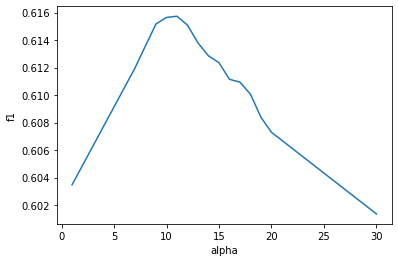

best f1_score = 0.615735294117647 for alpha = 11


In [ ]:
# Naive Bayes classifier for multinomial models

from sklearn.naive_bayes import MultinomialNB
import matplotlib.pyplot as plt

res=[]
alphas = [1,7,8,9,10,11,11,12,13,14,15,16,17,18,19,20,30]
for alpha in alphas:
  clf = MultinomialNB(alpha=alpha)
  clf.fit(X_train, y_train)
  pred = clf.predict(X_val)

  res.append(f1_score(y_val, pred, average='micro'))

plt.xlabel('alpha')
plt.ylabel('f1')
plt.plot(alphas,res)
plt.show()

print(f"best f1_score = {np.max(res)} for alpha = {alphas[np.argmax(res)]}")

100%|██████████| 5/5 [07:36<00:00, 91.28s/it]


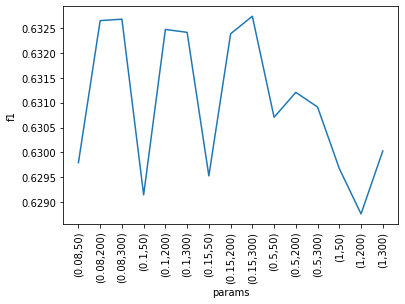

In [ ]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression
from sklearn.exceptions import ConvergenceWarning
import warnings
from tqdm import tqdm

with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=ConvergenceWarning)
    Cs = [0.08,0.1, 0.15,0.5, 1]
    max_iters = [50, 200, 300]

    best_score = -np.inf
    params = []
    res = []
    for C in tqdm(Cs):
      for max_iter in max_iters:
        params.append(f"({C},{max_iter})")
        clf = LogisticRegression(C=C, max_iter=max_iter)
        clf.fit(X_train,y_train)
        pred = clf.predict(X_val)
        score = f1_score(y_val, pred, average='micro')
        res.append(score)
        if score>best_score:
          best_score=score
          best_params = (C,max_iter)

plt.xlabel('params')
plt.ylabel('f1')
plt.xticks(rotation=90)
plt.plot(params,res)

print(f"best f1_score = {np.max(res)} for params = {best_params}")

100%|██████████| 3/3 [18:14<00:00, 365.00s/it]


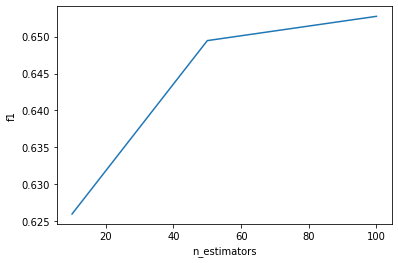

best f1_score = 0.6527647058823529 for alpha = 100


In [ ]:
# Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier

res=[]
n_estimators_l=[10,50,100]
for n_estimators in tqdm(n_estimators_l):
  clf = RandomForestClassifier(n_estimators=n_estimators,random_state=0)
  clf.fit(X_train, y_train)
  pred = clf.predict(X_val)

  res.append(f1_score(y_val, pred, average='micro'))

plt.xlabel('n_estimators')
plt.ylabel('f1')
plt.plot(n_estimators_l,res)
plt.show()

print(f"best f1_score = {np.max(res)} for n_estimators = {n_estimators_l[np.argmax(res)]}")

#### b) Regressors



The labels are ordered : Worst Concert Ever < Did Not Enjoy < Enjoyed < Best Concert Ever.

Hence it could be a good idea to translate the labels to numerical values and to use regressor algorithms to create predictions.

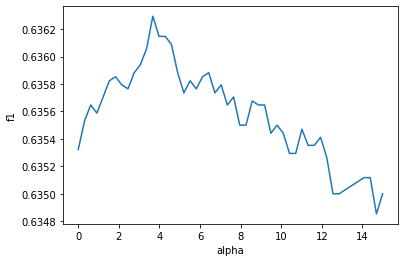

best f1_score = 0.6362941176470588 for alpha = 3.673469387755102


In [ ]:
# Ridge Regression

from sklearn.linear_model import Ridge
mapper = {"Worst Concert Ever" : 0, "Did Not Enjoy" : 1, "Enjoyed" : 2, "Best Concert Ever" : 3}
y_train_num = np.array(y_train.apply(lambda x : mapper[x]))
y_val_num = np.array(y_val.apply(lambda x : mapper[x]))
values=np.array(list(mapper.values()))

alphas=np.linspace(0,15,50)
res=[]
for alpha in alphas:
  regressor = Ridge(alpha=alpha)
  regressor.fit(X_train,y_train_num)
  num_pred = regressor.predict(X_val)
  round_pred = values[np.argmin((num_pred.reshape(-1,1) - values)**2,axis=1)]
  demaper = {mapper[i]:i for i in mapper}
  pred = np.array([demaper[i] for i in round_pred])
  res.append(f1_score(y_val, pred, average='micro'))

plt.xlabel('alpha')
plt.ylabel('f1')
plt.plot(alphas,res)
plt.show()

print(f"best f1_score = {np.max(res)} for alpha = {alphas[np.argmax(res)]}")

100%|██████████| 3/3 [45:29<00:00, 909.98s/it] 


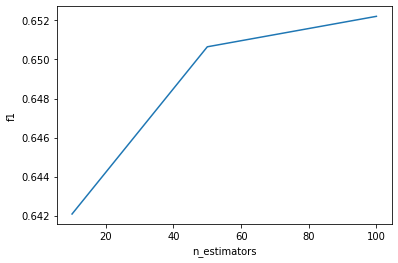

best f1_score = 0.6522058823529412 for alpha = 100


In [ ]:
# Random Tree Regression
from sklearn.ensemble import RandomForestRegressor
from tqdm import tqdm
mapper = {"Worst Concert Ever" : 0, "Did Not Enjoy" : 1, "Enjoyed" : 2, "Best Concert Ever" : 3}
y_train_num = np.array(y_train.apply(lambda x : mapper[x]))
y_val_num = np.array(y_val.apply(lambda x : mapper[x]))
values=np.array(list(mapper.values()))

n_estimators_l=[10,50,100]
res=[]
for n_estimators in tqdm(n_estimators_l):
  regressor = RandomForestRegressor(n_estimators=n_estimators,random_state=0)
  regressor.fit(X_train,y_train_num)
  num_pred = regressor.predict(X_val)
  round_pred = values[np.argmin((num_pred.reshape(-1,1) - values)**2,axis=1)]
  demaper = {mapper[i]:i for i in mapper}
  pred = np.array([demaper[i] for i in round_pred])
  res.append(f1_score(y_val, pred, average='micro'))

plt.xlabel('n_estimators')
plt.ylabel('f1')
plt.plot(n_estimators_l,res)
plt.show()

print(f"best f1_score = {np.max(res)} for alpha = {n_estimators_l[np.argmax(res)]}")

### 4. Improvements

#### a) Using a better model

We reached a better score using regression over mutli-classification, and using random forests over linear regression.

But Random Forest is long to train and it is difficult to reach f1_score over 66%.

To improve our results, we will use a regressor using gradient boosting, more precisely the one from catboost libreary as it's supposed to be well designed for high number of features.

In [ ]:
df_train = df.iloc[:170000]
df_test = df.iloc[170000:]
X_test = preprocess(df_train,df_test)
X_train = preprocess(df_train,df_train)

y_train = train["Concert Enjoyment"]

In [ ]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 1.2 MB/s 


In [ ]:
from catboost import CatBoostRegressor

In [ ]:
mapper = {"Worst Concert Ever" : 0, "Did Not Enjoy" : 1, "Enjoyed" : 2, "Best Concert Ever" : 3}

# Class building classifier from CatBoostRegressor
class CustomRegressor(CatBoostRegressor):
  def fit(self,X,y):
    y_num = np.array(y.apply(lambda x : mapper[x]))
    super().fit(X,y_num)
  def predict(self,X):
    num_pred = super().predict(X)
    values=np.array(list(mapper.values()))
    round_pred = values[np.argmin((num_pred.reshape(-1,1) - values)**2,axis=1)]
    demaper = {mapper[i]:i for i in mapper}
    pred = np.array([demaper[i] for i in round_pred])
    return pred

In [ ]:
regressor = CustomRegressor()

clf = GridSearchCV(regressor,{"n_estimators":[9000,10000,11000],"learning_rate":[0.1],"subsample":[0.8],"random_seed":[0],"verbose":[0]},verbose=10,scoring='f1_micro')
clf.fit(X_train,y_train)

print()
print(f"Best f1_score : {clf.best_score_} using parameters : {clf.best_params_}")

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV 1/5; 1/3] START learning_rate=0.1, n_estimators=9000, random_seed=0, subsample=0.8, verbose=0
[CV 1/5; 1/3] END learning_rate=0.1, n_estimators=9000, random_seed=0, subsample=0.8, verbose=0;, score=0.703 total time= 4.7min
[CV 2/5; 1/3] START learning_rate=0.1, n_estimators=9000, random_seed=0, subsample=0.8, verbose=0
[CV 2/5; 1/3] END learning_rate=0.1, n_estimators=9000, random_seed=0, subsample=0.8, verbose=0;, score=0.697 total time= 4.6min
[CV 3/5; 1/3] START learning_rate=0.1, n_estimators=9000, random_seed=0, subsample=0.8, verbose=0
[CV 3/5; 1/3] END learning_rate=0.1, n_estimators=9000, random_seed=0, subsample=0.8, verbose=0;, score=0.702 total time= 4.5min
[CV 4/5; 1/3] START learning_rate=0.1, n_estimators=9000, random_seed=0, subsample=0.8, verbose=0
[CV 4/5; 1/3] END learning_rate=0.1, n_estimators=9000, random_seed=0, subsample=0.8, verbose=0;, score=0.699 total time= 4.5min
[CV 5/5; 1/3] START learning_rat

In [ ]:
clf = CustomRegressor(n_estimators=11000,learning_rate=0.1,subsample=0.8,random_seed=0,verbose=0)
clf.fit(X_train,y_train)


In [ ]:
def form_pred(pred):
  res =  pd.DataFrame(pred,columns=['Predicted'])
  res = pd.concat([test,res],axis=1)[["Id","Predicted"]]
  return res

In [ ]:
pred = clf.predict(X_test)
formed_pred = form_pred(pred)
formed_pred

,Id,Predicted
0,ConcertExperience_70055,Enjoyed
1,ConcertExperience_34799,Enjoyed
2,ConcertExperience_100410,Enjoyed
3,ConcertExperience_106446,Did Not Enjoy
4,ConcertExperience_127249,Did Not Enjoy
...,...,...
29995,ConcertExperience_82288,Did Not Enjoy
29996,ConcertExperience_27139,Did Not Enjoy
29997,ConcertExperience_197434,Best Concert Ever
29998,ConcertExperience_166029,Worst Concert Ever


In [ ]:
formed_pred.to_csv("Prediction7.csv",index=False)

#### b) Creating new features

Finally, we can try bringing creating new features in order to try improving our results more. We tried to add 3 kinds features :
* The presence of similar words in the Band Names
* Wether or not the country of origin of Concert Goers are english speaking countries
* The continent of origin of Concert Goers.

In [ ]:
# from google.colab import drive
# drive.mount('gdrive')
# PATH = 'gdrive/MyDrive/Kaggle/'
df = pd.read_csv("imputed_df (4).csv",index_col=0)

In [ ]:
df[categorical_columns].apply(lambda x:len(np.unique(x)))

Band Name                           53
Band Genre                           7
Band Country of Origin               3
Concert ID                        1000
Inside Venue                         2
Rain                                 2
Seated                               2
Concert Goer ID                   2000
Concert Goer Country of Origin     152
dtype: int64

In [ ]:
df[numerical_columns].apply(lambda x:f"min:{round(np.min(x),2)}, max:{round(np.max(x),2)}")

Band Debut                min:1955.0, max:2014.0
Concert Attendance      min:53.65, max:162754.27
Personnality Trait 1         min:-3.12, max:3.63
Personnality Trait 2         min:-4.41, max:3.86
Personnality Trait 3         min:-3.28, max:3.31
Personnality Trait 4         min:-3.29, max:3.83
Concert Goer Age              min:16.0, max:76.0
Height (cm)                 min:140.0, max:190.0
dtype: object

In [ ]:
np.unique(df["Band Name"])

array(['A Dozen Running Iced Frogs', 'Allo Knickers', 'Beyond Devon',
       'Big Autumn', 'Big Division', 'Big Frogs Dream', 'Big Joystick',
       'Crazy Crazy', 'Crazy Dream and a Pinch of Joystick',
       'Crazy Frogs of Devon', 'Crazy Joystick Cult', 'Crazy Tooth',
       'Crazyplay', 'Das Joystick', 'Devon Revival',
       'Devon Thunder Thighs', 'Disciples Of Devon',
       'Flight of the Knickers', 'Frogsica', "It's My Joystick",
       'Joystick A Dozen', 'Joystick Army', 'Joystick Attack',
       'Joystick for the Jockies', 'Joystick of the Big Knickers',
       'King Blue', 'Knickers A Dozen', 'Knickers for the Jockies',
       'Lord of the Crazy Frogs', 'My Heart, Your Thighs',
       'Puddle of Joystick', 'Purely Blue', 'Ron Nor', 'Ron Talent',
       "Ron's Midnight Jockies", 'Ronatron', 'Rubbish Devon Frogs',
       'Running Twins', 'Running at the Disco',
       'Running for the Crazy Woman', 'Running in Devon',
       'Super Crazy Frogs', 'Taking Back Autumn',
       

In [ ]:
from collections import Counter
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords = stopwords.words('english')

vocab = set(" ".join(np.unique(df["Band Name"])).lower().split(" "))
word_count = Counter(" ".join(np.unique(df["Band Name"])).lower().split(" "))
sorted_words = sorted([(word_count[word],word) for word in word_count if word_count[word]>2],reverse=True)
frequent_words = [t[1] for t in sorted_words]
filtered = []
for word in frequent_words:
  if word not in stopwords:
    filtered.append(word)
filtered

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['joystick',
 'crazy',
 'knickers',
 'devon',
 'running',
 'frogs',
 'big',
 'jockies',
 'dozen',
 'blue']

In [ ]:
for word in filtered:
  df[word] = df["Band Name"].apply(lambda x:1 if word in x.lower().split(" ") else 0)

In [ ]:
engl = ["Antigua and Barbuda","Australia","Bahamas","Barbados","Belize","Canada","Dominican Republic","Grenada","Ireland","Jamaica","Malta","New Zealand","Saint Lucia","Trinidad and Tobago","United Kingdom (UK)","United States of America (USA)"]
df["Eng"] = df["Concert Goer Country of Origin"].apply(lambda x:x in engl)

In [ ]:
North_America = ['Antigua and Barbuda', 'Bahamas', 'Barbados', 'Belize', 'Canada',
       'Costa Rica', 'Dominican Republic', 'El Salvador', 'Grenada',
       'Haiti', 'Honduras', 'Jamaica', 'Panama', 'Saint Lucia',
       'United States of America (USA)']
South_America = ['Argentina', 'Bolivia', 'Brazil', 'Chile', 'Ecuador', 'Paraguay',
       'Paraguay', 'Peru', 'Suriname', 'Trinidad and Tobago']
Europe = ['Albania', 'Andorra', 'Austria', 'Belgium',
       'Bosnia and Herzegovina', 'Bulgaria', 'Croatia', 'Cyprus',
       'Czechia', 'Denmark', 'Estonia', 'Finland', 'France', 'Germany',
       'Greece', 'Iceland', 'Ireland', 'Kosovo', 'Latvia',
       'Liechtenstein', 'Lithuania', 'Luxembourg', 'Malta', 'Moldova',
       'Monaco', 'Montenegro', 'Netherlands', 'Norway', 'Poland',
       'Portugal', 'Romania', 'Serbia', 'Slovakia', 'Slovenia', 'Spain',
       'Sweden', 'Switzerland', 'United Kingdom (UK)',
       'Vatican City (Holy See)']
Africa = ['Algeria', 'Angola', 'Botswana', 'Burkina Faso', 'Burundi',
       'Cabo Verde', 'Cameroon', 'Central African Republic (CAR)', 'Chad',
       'Comoros', 'Congo, Democratic Republic of the', "Cote d'Ivoire",
       'Djibouti', 'Equatorial Guinea', 'Eswatini', 'Gambia', 'Ghana',
       'Guinea-Bissau', 'Kenya', 'Lesotho', 'Liberia', 'Madagascar',
       'Malawi', 'Mali', 'Mauritania', 'Mozambique', 'Namibia', 'Niger',
       'Nigeria', 'Rwanda', 'Sao Tome and Principe', 'Senegal',
       'Seychelles', 'Sierra Leone', 'Somalia', 'South Africa',
       'South Sudan', 'Sudan', 'Tanzania', 'Tunisia', 'Uganda', 'Zambia',
       'Zimbabwe']
Asia = ['Azerbaijan', 'Bahrain', 'Bhutan', 'China', 'Georgia', 'India',
       'Indonesia', 'Iraq', 'Israel', 'Japan', 'Jordan', 'Kazakhstan',
       'Kuwait', 'Kyrgyzstan', 'Laos', 'Lebanon', 'Malaysia', 'Maldives',
       'Myanmar', 'Nepal', 'North Korea', 'Palestine', 'Philippines',
       'Russia', 'Saudi Arabia', 'Singapore', 'Sri Lanka', 'Taiwan',
       'Thailand', 'Timor-Leste', 'Turkey', 'United Arab Emirates (UAE)',
       'Uzbekistan', 'Vietnam', 'Yemen']
Oceania = ['Australia', 'Fiji', 'Micronesia', 'Nauru', 'New Zealand', 'Palau',
       'Papua New Guinea', 'Samoa', 'Solomon Islands', 'Tonga', 'Vanuatu']


country_to_continent = {}
for country in North_America:
  country_to_continent[country] = 'North_America'
for country in South_America:
  country_to_continent[country] = 'South_America'
for country in Europe:
  country_to_continent[country] = 'Europe'
for country in Africa:
  country_to_continent[country] = 'Africa'
for country in Asia:
  country_to_continent[country] = 'Asia'
for country in Oceania:
  country_to_continent[country] = 'Oceania'

df["Continent"] = df["Concert Goer Country of Origin"].apply(lambda x:country_to_continent[x])

np.unique(df["Continent"])

array(['Africa', 'Asia', 'Europe', 'North_America', 'Oceania',
       'South_America'], dtype=object)

In [ ]:
df_train = df.iloc[:170000]
df_test = df.iloc[170000:]

In [ ]:
X_test = preprocess(df_train,df_test,categorical_columns=["Band Name","Band Genre","Band Country of Origin","Concert ID","Inside Venue","Rain",
                                    "Seated","Concert Goer ID","Concert Goer Country of Origin"]+filtered+["Eng"]+["Continent"])
X_train = preprocess(df_train,df_train,categorical_columns=["Band Name","Band Genre","Band Country of Origin","Concert ID","Inside Venue","Rain",
                                    "Seated","Concert Goer ID","Concert Goer Country of Origin"]+filtered+["Eng"]+["Continent"])

In [ ]:
regressor = CustomRegressor()

clf = GridSearchCV(regressor,{"n_estimators":[10000,11000,12000],"learning_rate":[0.1],"subsample":[0.8],"random_seed":[0],"verbose":[0]},verbose=10,scoring='f1_micro')
clf.fit(X_train,y_train)

print()
print(clf.best_score_,clf.best_params_)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV 1/5; 1/3] START learning_rate=0.1, n_estimators=10000, random_seed=0, subsample=0.8, verbose=0
[CV 1/5; 1/3] END learning_rate=0.1, n_estimators=10000, random_seed=0, subsample=0.8, verbose=0;, score=0.701 total time= 5.4min
[CV 2/5; 1/3] START learning_rate=0.1, n_estimators=10000, random_seed=0, subsample=0.8, verbose=0
[CV 2/5; 1/3] END learning_rate=0.1, n_estimators=10000, random_seed=0, subsample=0.8, verbose=0;, score=0.697 total time= 5.4min
[CV 3/5; 1/3] START learning_rate=0.1, n_estimators=10000, random_seed=0, subsample=0.8, verbose=0
[CV 3/5; 1/3] END learning_rate=0.1, n_estimators=10000, random_seed=0, subsample=0.8, verbose=0;, score=0.702 total time= 5.3min
[CV 4/5; 1/3] START learning_rate=0.1, n_estimators=10000, random_seed=0, subsample=0.8, verbose=0
[CV 4/5; 1/3] END learning_rate=0.1, n_estimators=10000, random_seed=0, subsample=0.8, verbose=0;, score=0.698 total time= 5.3min
[CV 5/5; 1/3] START lear

We see that the addition of features didn't improve the results.
We could try with different features, or combine with dimensionality reduction or some features dropping.
For now, we keep the results from part a) for the test prediction.